In [1]:
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np

# Synthetic data generation
np.random.seed(42)
data = {
    'customer_interactions': np.random.randint(1, 20, 1000),
    'purchase_history': np.random.randint(0, 5, 1000),
    'website_visits': np.random.randint(10, 100, 1000),
    'lead_converted': np.random.randint(0, 2, 1000)
}
df = pd.DataFrame(data)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('lead_converted', axis=1)
y = df['lead_converted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Neural Network
def create_nn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5196 - loss: 0.6977 - val_accuracy: 0.4938 - val_loss: 0.7003
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5532 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.6940
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5393 - loss: 0.6881 - val_accuracy: 0.5250 - val_loss: 0.6948
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5690 - loss: 0.6796 - val_accuracy: 0.5250 - val_loss: 0.6954
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5585 - loss: 0.6823 - val_accuracy: 0.5375 - val_loss: 0.6918
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5656 - loss: 0.6809 - val_accuracy: 0.5562 - val_loss: 0.6911
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5659 - loss: 0.6835 - val_accuracy: 0.4938 - val_loss: 0.6948
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5730 - loss: 0.6789 - val_accuracy: 0.5375 - val_loss: 0.6893


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.47      0.75      0.57        92
           1       0.56      0.27      0.36       108

    accuracy                           0.49       200
   macro avg       0.51      0.51      0.47       200
weighted avg       0.52      0.49      0.46       200


Neural Network Report:
              precision    recall  f1-score   support

           0       0.48      0.55      0.51        92
           1       0.56      0.48      0.52       108

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

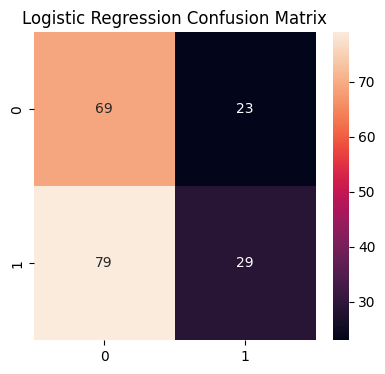

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
lr_pred = lr_model.predict(X_test)
nn_pred = (nn_model.predict(X_test) > 0.5).astype(int)

# Evaluation metrics
print("Logistic Regression Report:")
print(classification_report(y_test, lr_pred))

print("\nNeural Network Report:")
print(classification_report(y_test, nn_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')

In [6]:
import joblib

# Save model
joblib.dump(lr_model, 'lead_scoring_model.pkl')

# Simple prediction function
def predict_lead_conversion(customer_data):
    scaled_data = scaler.transform([customer_data])
    probability = lr_model.predict_proba(scaled_data)[0][1]
    return f"Lead Conversion Probability: {probability:.2%}"

# Example usage
sample_lead = [15, 3, 75]  # customer_interactions, purchase_history, website_visits
print(predict_lead_conversion(sample_lead))

Lead Conversion Probability: 46.44%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
